In [181]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm

In [182]:
# Datos
# ==============================================================================
datos = np.array([
           2.1,2.7,2.5,2.5,2.4,2.2,2.1,2.0,2.2,2.4,
           2.0,2.6,2.4,2.4,2.3,2.3,2.1,2.7,2.2,2.5
        ])



[Text(0.5, 0, 'Vida media muon'),
 Text(0.5, 1.0, 'Densidad de probabilidad e histograma datos vida media muon')]

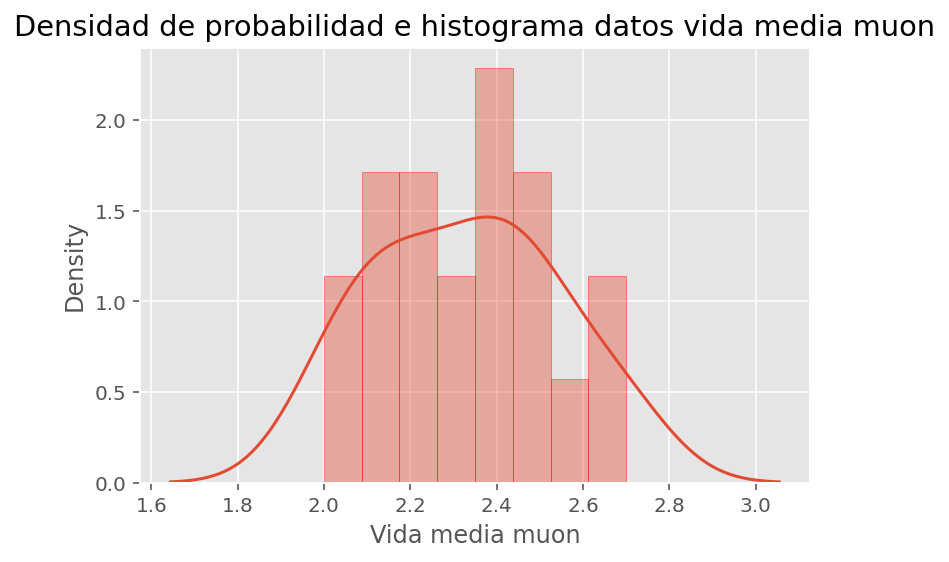

In [190]:
# Gráficos distribución observada
# ==============================================================================

ax = sns.distplot(datos, hist=True, kde=True, bins=8, hist_kws={'edgecolor':'red'})
ax.set(xlabel='Vida media muon', title='Densidad de probabilidad e histograma datos vida media muon')

In [184]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante muestreo repetido con reposición (bootstrapping).
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [196]:
print(np.mean(datos))

2.33


In [185]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 36063.92it/s]


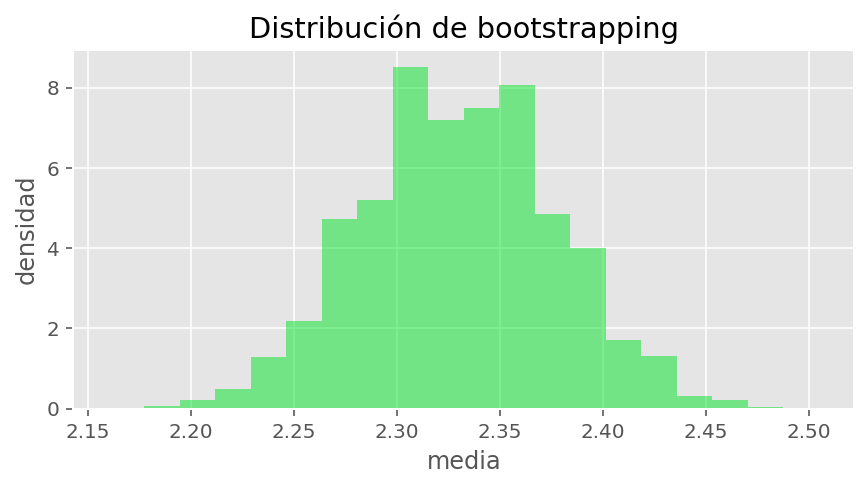

In [191]:
# Distribución de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=20, density=True, color='#00e428', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

[Text(0.5, 0, 'Promedio Vida media muon'),
 Text(0.5, 1.0, 'Densidad de probabilidad e histograma de bootstrapping')]

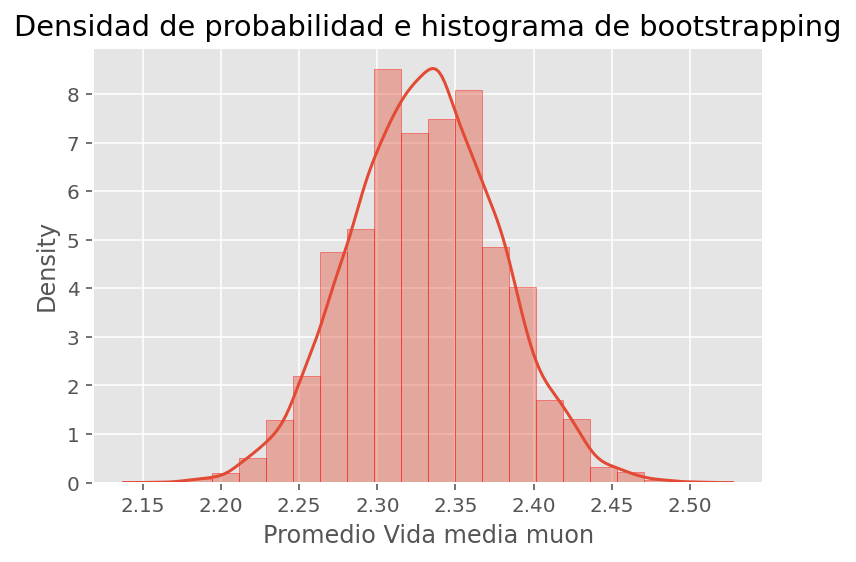

In [195]:
ax = sns.distplot(dist_boot, hist=True, kde=True, bins=20, hist_kws={'edgecolor':'red'})
ax.set(xlabel='Promedio Vida media muon', title='Densidad de probabilidad e histograma de bootstrapping')

In [187]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[2.24  2.425]


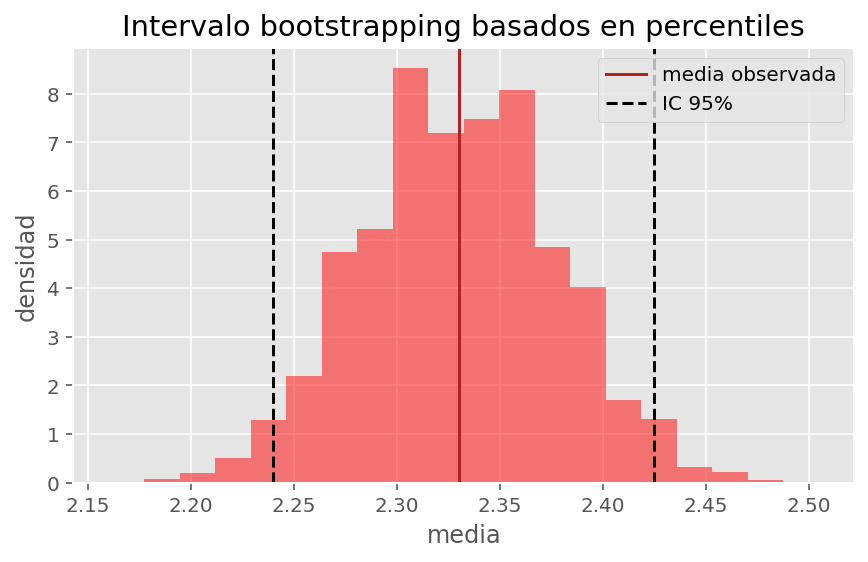

In [200]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=20, density=True, color='red', alpha=0.5)
ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();

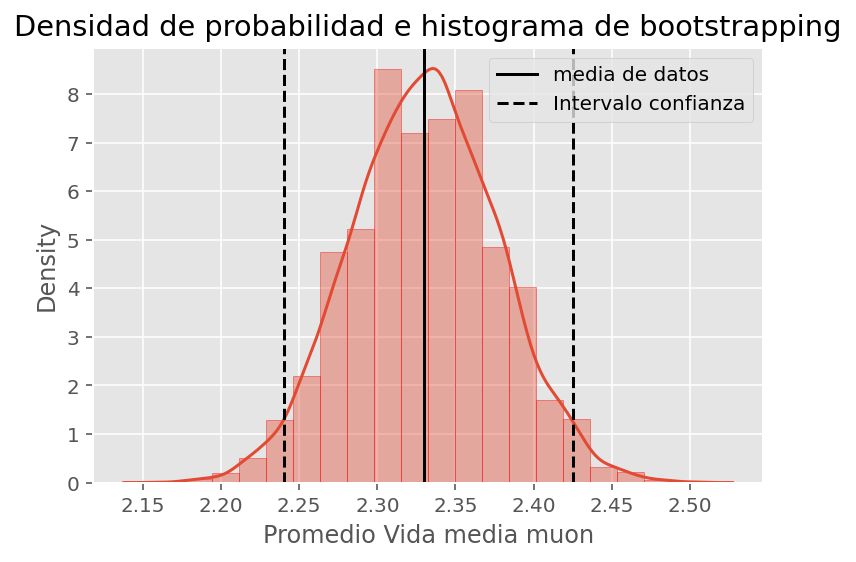

In [207]:
ax = sns.distplot(dist_boot, hist=True, kde=True, bins=20, hist_kws={'edgecolor':'red'})
ax.set(xlabel='Promedio Vida media muon', title='Densidad de probabilidad e histograma de bootstrapping')
ax.axvline(x=datos.mean(), color='black', label='media de datos')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='Intervalo confianza')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.legend();
